# Alcohol Consumption in Russia Dataset

## Project Brief

Your company owns a chain of stores across Russia that sell a variety of types of alcohol. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful and need help determining which regions they should select.

## Data

Dataset has 1615 rows and 7 columns. Keys for columns:

"year" - year (1998-2016)

"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast

"wine" - sale of wine in litres by year per capita

"beer" - sale of beer in litres by year per capita

"vodka" - sale of vodka in litres by year per capita

"champagne" - sale of champagne in litres by year per capita

"brandy" - sale of brandy in litres by year per capita


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data importing

In [2]:
# Unloading the table to a new dataframe: df
df = pd.read_csv('alcohol-consumption-in-russia.csv')

# Display the first 5 rows of df
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


## Analyzing the data

In [3]:
# Describing some statistical metrics of df
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [4]:
# Displaying the percentage of NA values
df.isna().sum()/df.shape[0]*100

year         0.000000
region       0.000000
wine         3.900929
beer         3.591331
vodka        3.777090
champagne    3.900929
brandy       4.086687
dtype: float64

Since the percentage of NA values is low compared to the size of the dataset, i opted to drop the NA values

I'm going to include two features related to the nature of the alcohol drink, if it's fermented or it's distilled, its values are equal to the mean of the volume of liter sold for each class

In [5]:
# Separating the two classes, fermented drinks and distilled drinks
fermented = ['wine','beer','champagne']
distilled = ['vodka','brandy']

## Summarizing by Region

In [6]:
# Agregating df dataframe by region and summing the quantity of alcohol
df_agg = df.groupby('region')['wine','beer','vodka','champagne','brandy'].agg('sum')
df_agg

,wine,beer,vodka,champagne,brandy
region,,,,,
Altai Krai,60.31,919.09,179.85,22.94,4.50
Altai Republic,98.61,697.76,183.99,17.76,4.82
Amur Oblast,99.21,1014.17,270.12,21.20,7.54
Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54
Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86
Belgorod Oblast,63.40,740.77,165.05,20.38,4.86
Bryansk Oblast,125.26,819.53,167.56,18.19,5.13
Chechen Republic,0.00,8.30,0.00,0.00,0.00
Chelyabinsk Oblast,131.94,1408.80,245.93,27.84,10.65


In [7]:
# Creating the dataframe with distilled and fermented drinks' liters consumed
df_agg['fermented_mean'] = df_agg[fermented].mean(axis=1)
df_agg['distilled_mean'] = df_agg[distilled].mean(axis=1)
df_agg['alcohol_total'] = df_agg['distilled_mean']+df_agg['fermented_mean']
df_agg.reset_index(inplace=True)
df_agg

,region,wine,beer,vodka,champagne,brandy,fermented_mean,distilled_mean,alcohol_total
0,Altai Krai,60.31,919.09,179.85,22.94,4.50,334.113333,92.175,426.288333
1,Altai Republic,98.61,697.76,183.99,17.76,4.82,271.376667,94.405,365.781667
2,Amur Oblast,99.21,1014.17,270.12,21.20,7.54,378.193333,138.830,517.023333
3,Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54,363.140000,173.390,536.530000
4,Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86,380.166667,91.750,471.916667
5,Belgorod Oblast,63.40,740.77,165.05,20.38,4.86,274.850000,84.955,359.805000
6,Bryansk Oblast,125.26,819.53,167.56,18.19,5.13,320.993333,86.345,407.338333
7,Chechen Republic,0.00,8.30,0.00,0.00,0.00,2.766667,0.000,2.766667
8,Chelyabinsk Oblast,131.94,1408.80,245.93,27.84,10.65,522.860000,128.290,651.150000
9,Chukotka Autonomous Okrug,79.33,292.91,241.54,39.10,17.78,137.113333,129.660,266.773333


## Analysis to verify the profile of consumption

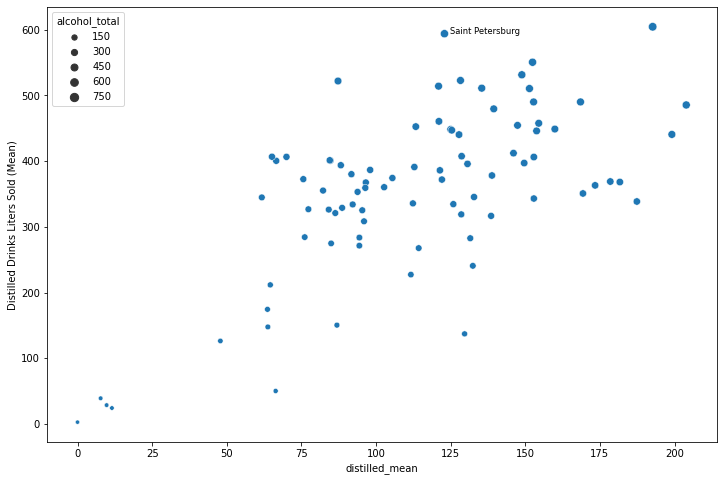

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='distilled_mean',y='fermented_mean', data = df_agg, size='alcohol_total')

for r in df_agg['region']:
    if r == 'Saint Petersburg':
        df_SP = df_agg[df_agg['region'] == r]
        #print(df_SP['distilled_mean']+2, df_SP['fermented_mean'])
        plt.text(df_SP['distilled_mean']+2, df_SP['fermented_mean'], r, horizontalalignment='left', size='small', color='black')

plt.ylabel("Fermented Drinks Liters Sold (Mean)")        
plt.ylabel("Distilled Drinks Liters Sold (Mean)")
plt.show()

In [9]:
df_agg[df_agg['region'] == 'Saint Petersburg'][['distilled_mean','fermented_mean']]

,distilled_mean,fermented_mean
61,122.92,594.046667


According to the scatterplot, our target that is Saint Petersburg has a mean of consuption of fermented and distilled drinks of 122.92 and 594 respectively, so we must find the top 10 regions that have a similar consuption

In [10]:
# Separating the indices for each one of russian Oblasts
i = [j for j in range(len(df_agg))]
region = [k for k in df_agg['region']]

indices_oblasts = dict(zip(i, region))

## Applying the K-Means clustering method

In [11]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq, whiten

In [12]:
# Separating the columns of interest
df_kmeans = df_agg[['fermented_mean', 'distilled_mean']]

# Normalizing the features
df_kmeans['fermented_norm'] = whiten(df_kmeans['fermented_mean'])
df_kmeans['distilled_norm'] = whiten(df_kmeans['distilled_mean'])

df_kmeans

,fermented_mean,distilled_mean,fermented_norm,distilled_norm
0,334.113333,92.175,2.644747,2.172373
1,271.376667,94.405,2.148141,2.224930
2,378.193333,138.830,2.993671,3.271934
3,363.140000,173.390,2.874514,4.086442
4,380.166667,91.750,3.009292,2.162357
5,274.850000,84.955,2.175635,2.002213
6,320.993333,86.345,2.540892,2.034972
7,2.766667,0.000,0.021900,0.000000
8,522.860000,128.290,4.138812,3.023528
9,137.113333,129.660,1.085350,3.055817


## Calculating the optimal number of clusters

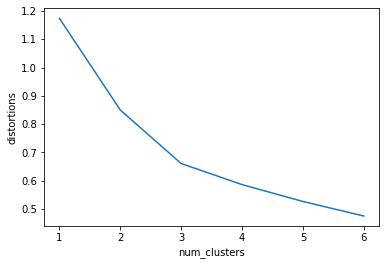

In [13]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df_kmeans[['distilled_norm','fermented_norm']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Considering the graph above, the optimal number of clusters is 3

In [14]:
# Generate cluster centers
cluster_centers, distortion = kmeans(df_kmeans[['distilled_norm', 'fermented_norm']], 3)

# Assign cluster labels
df_kmeans['cluster_labels'], distortion_list = vq(df_kmeans[['distilled_norm', 'fermented_norm']], cluster_centers)

## Plotting the clustered regions

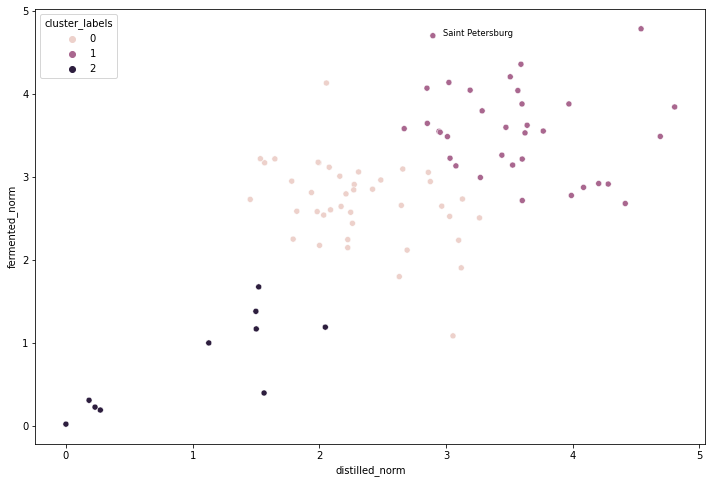

In [15]:
# Plot clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x='distilled_norm', y='fermented_norm', 
                hue='cluster_labels', data = df_kmeans)

plt.text(df_kmeans.loc[61,'distilled_norm']+0.08, df_kmeans.loc[61,'fermented_norm'], 'Saint Petersburg', horizontalalignment='left', size='small', color='black')

plt.show()

In [16]:
df_kmeans.iloc[61,:]

fermented_mean    594.046667
distilled_mean    122.920000
fermented_norm      4.702305
distilled_norm      2.896969
cluster_labels      1.000000
Name: 61, dtype: float64

## Plotting Saint Petersburg's Cluster

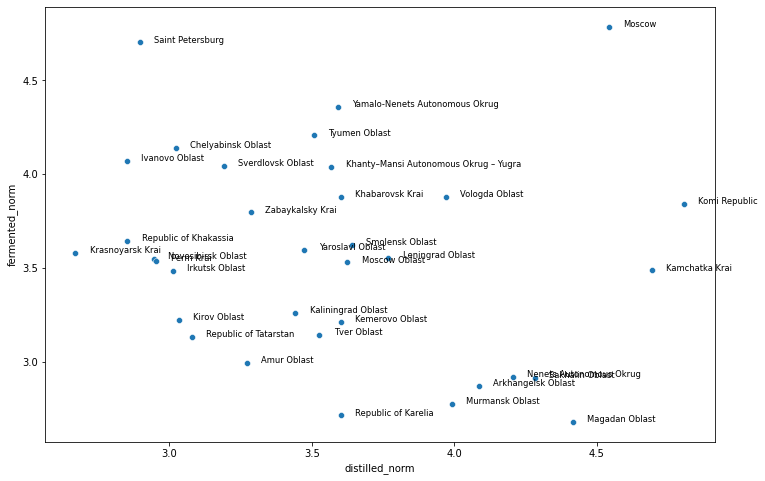

In [20]:
df_cl2 = df_kmeans[df_kmeans['cluster_labels'] == 1]

# Plot clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x='distilled_norm', y='fermented_norm', data = df_cl2)

for i in df_cl2.index: 
    plt.text(df_kmeans.loc[i,'distilled_norm']+0.05, df_kmeans.loc[i,'fermented_norm'], indices_oblasts[i], horizontalalignment='left', size='small', color='black')

plt.show()

In [21]:
# Measure of the Euclidean Distance of the Reagions in the Cluster to Saint Petersburg
df_cl2['distance_saint_petersburg'] = np.sqrt((df_cl2['fermented_norm'] - df_cl2.loc[61, 'fermented_norm'])**2 + 
                                               (df_cl2['distilled_norm'] - df_cl2.loc[61, 'distilled_norm'])**2)

df_cl2 = df_cl2.join(df_agg['region'])

# Displaying the Top 10 nearest regions to Saint Petersburg
df_cl2.sort_values('distance_saint_petersburg')[:11]

,fermented_mean,distilled_mean,fermented_norm,distilled_norm,cluster_labels,distance_saint_petersburg,region
61,594.046667,122.920,4.702305,2.896969,1,0.000000,Saint Petersburg
8,522.860000,128.290,4.138812,3.023528,1,0.577531,Chelyabinsk Oblast
12,514.166667,120.945,4.069998,2.850422,1,0.634018,Ivanovo Oblast
69,511.113333,135.405,4.045829,3.191214,1,0.719404,Sverdlovsk Oblast
82,550.593333,152.425,4.358341,3.592340,1,0.775792,Yamalo-Nenets Autonomous Okrug
75,531.483333,148.840,4.207072,3.507849,1,0.786404,Tyumen Oblast
21,510.546667,151.395,4.041343,3.568065,1,0.941935,Khanty–Mansi Autonomous Okrug – Yugra
84,479.640000,139.430,3.796695,3.286075,1,0.985665,Zabaykalsky Krai
55,460.593333,121.060,3.645927,2.853132,1,1.057288,Republic of Khakassia
20,490.136667,152.780,3.879783,3.600707,1,1.082493,Khabarovsk Krai


Considering the table, we have the regions which have the most likely behaviour regarding consumption of alcohol as Saint Petersburg. Focusing on those regions would boost our sales.